In [1]:
exec(open('imports.py').read())
from datetime import datetime
import dask
import matplotlib.ticker as mtk
import colormaps as cmaps 
import matplotlib.patheffects as path_effects

from tqdm import tqdm
%config InlineBackend.figure_format = 'retina'


ERROR 1: PROJ: proj_create_from_database: Open of /global/homes/k/kquagra/miniconda3/envs/climate_py311.5/share/proj failed


# HOW DID I SAVE THE SUPERIMPOSED DATASETS?

* I selected the landfalling points
* I saved the points for the years separately
* The composites for the datasets are saved this way
    * I selected the year,
    * I selected the locations and iterated through the locations for a specific year
    * I then continued for the various years in that same order
    

In [2]:
### LOAD DATA FOR LOCATIONS

random_locs = open('conus_ARS_cascade_bard_v1/random_locations.txt')
random_locs = random_locs.readlines()
random_locs = [locs[1:-2].split(',') for locs in random_locs]
random_locs = [ [float(locs[0]), float(locs[1])] for locs in random_locs ]
#random_locs = [[ly,lx] for l]

In [3]:
random_locs

[[48.75, 235.25],
 [44.25, 236.0],
 [45.75, 236.25],
 [45.0, 236.5],
 [37.0, 238.25],
 [33.5, 242.5],
 [30.0, 244.25],
 [31.25, 247.0],
 [25.5, 248.0],
 [27.0, 250.25]]

## LOAD THE DATA TIMES FOR THE ARDTS

In [11]:
cascade_dates = []
ardt_names = ['cascade_bard_v1','SCAFET','guan_waliser','connect500','mundhenk_v3','reid250','gershunov','lora_v2']

#iterate through the ARDTs 
for ardt in ardt_names:
    print(f'Loading data for {ardt}')
    locals()[ardt] = []
    locals()[f'{ardt}_locsprops'] = collections.defaultdict(list)
    locals()[f'{ardt}_locsdates'] = collections.defaultdict(list)
    for lty,lnx in random_locs:

        loc_dt = open(f'conus_ARS_{ardt}/ARS_lf_{lty}E_{lnx}N_1980-2020_full.txt','r')
        loc_dt = loc_dt.readlines()
        loc_dt = [loc.split('\n')[0] for loc in loc_dt]
        #dt_len = collections.defaultdict(list)
        for r in range(1980,2018):
            dp = [a for a in loc_dt if f'{str(r)}' in a]
            #dt_len[str(r)] = len(dp)
            eval(f'{ardt}_locsprops')[f'{lnx}E_{lty}N_{r}'] = int(len(dp))
            eval(f'{ardt}_locsdates')[f'{lnx}E_{lty}N_{r}'] = dp
            
            dp = [ f'{lty}{lnx}_{d}' for d in dp ]
            eval(ardt).append(dp)

    locals()[ardt] = sum(eval(ardt),[])
    #eval(ardt). ds_sum

Loading data for cascade_bard_v1
Loading data for SCAFET
Loading data for guan_waliser
Loading data for connect500
Loading data for mundhenk_v3
Loading data for reid250
Loading data for gershunov
Loading data for lora_v2


In [5]:
cascade_bard_v1

['48.75235.25_1980-01-12T06:00:00.00000',
 '48.75235.25_1980-01-12T09:00:00.00000',
 '48.75235.25_1980-01-12T12:00:00.00000',
 '48.75235.25_1980-01-12T15:00:00.00000',
 '48.75235.25_1980-02-02T15:00:00.00000',
 '48.75235.25_1980-02-26T06:00:00.00000',
 '48.75235.25_1980-02-26T09:00:00.00000',
 '48.75235.25_1980-02-26T12:00:00.00000',
 '48.75235.25_1980-02-26T15:00:00.00000',
 '48.75235.25_1980-02-26T18:00:00.00000',
 '48.75235.25_1980-02-26T21:00:00.00000',
 '48.75235.25_1980-12-10T00:00:00.00000',
 '48.75235.25_1980-12-10T06:00:00.00000',
 '48.75235.25_1980-12-10T09:00:00.00000',
 '48.75235.25_1980-12-10T12:00:00.00000',
 '48.75235.25_1980-12-10T15:00:00.00000',
 '48.75235.25_1980-12-10T18:00:00.00000',
 '48.75235.25_1980-12-10T21:00:00.00000',
 '48.75235.25_1980-12-11T00:00:00.00000',
 '48.75235.25_1980-12-11T03:00:00.00000',
 '48.75235.25_1980-12-11T06:00:00.00000',
 '48.75235.25_1980-12-11T09:00:00.00000',
 '48.75235.25_1980-12-11T12:00:00.00000',
 '48.75235.25_1980-12-11T15:00:00.

In [6]:
lora_v2_locsdates['235.25E_48.75N_1980']

['1980-01-12T03:00:00.00000',
 '1980-01-12T06:00:00.00000',
 '1980-01-12T09:00:00.00000',
 '1980-01-12T12:00:00.00000',
 '1980-01-12T15:00:00.00000',
 '1980-01-23T18:00:00.00000',
 '1980-01-23T21:00:00.00000',
 '1980-01-24T00:00:00.00000',
 '1980-01-24T03:00:00.00000',
 '1980-01-24T06:00:00.00000',
 '1980-02-02T12:00:00.00000',
 '1980-02-02T15:00:00.00000',
 '1980-02-02T18:00:00.00000',
 '1980-02-02T21:00:00.00000',
 '1980-02-26T06:00:00.00000',
 '1980-02-26T09:00:00.00000',
 '1980-02-26T12:00:00.00000',
 '1980-02-26T15:00:00.00000',
 '1980-02-26T18:00:00.00000',
 '1980-02-26T21:00:00.00000',
 '1980-02-27T00:00:00.00000',
 '1980-02-27T12:00:00.00000',
 '1980-02-27T18:00:00.00000',
 '1980-02-27T21:00:00.00000',
 '1980-02-28T00:00:00.00000',
 '1980-12-10T00:00:00.00000',
 '1980-12-10T03:00:00.00000',
 '1980-12-10T06:00:00.00000',
 '1980-12-10T09:00:00.00000',
 '1980-12-10T12:00:00.00000',
 '1980-12-10T15:00:00.00000',
 '1980-12-10T18:00:00.00000',
 '1980-12-10T21:00:00.00000',
 '1980-12-

## GROUP THE TIMES INTO THE TOTAL NUMBER OF TIMES FOR ALL LOCATIONS FOR A SPECIFIC YEAR

In [31]:
#for yr in range(1980,2018):
locals()[f'{ardt_names[0]}_years'] = collections.defaultdict()
for lty,lnx in random_locs:
    check = f'{lnx}E_{lty}N_2014'
    check = '_2014'
    totals = [int(cascade_bard_v1_locsprops[a]) for a in cascade_bard_v1_locsprops.keys() if check in a]
    totals = sum(totals)
    eval(f'{ardt_names[0]}_years')['2014'] = totals

In [32]:
totals

169

In [118]:
xr.open_mfdataset('MERRA2/conus_ARS_DJF_comps_cascade_bard_v1_ivt_raw/ARS_supperimposed_ivt_*_cascade_bard_v1.nc')

<xarray.Dataset>
Dimensions:  (lat: 61, lon: 81, time: 6524)
Coordinates:
  * lat      (lat) float64 -15.0 -14.5 -14.0 -13.5 -13.0 ... 13.5 14.0 14.5 15.0
  * lon      (lon) float64 -25.0 -24.38 -23.75 -23.12 ... 23.12 23.75 24.38 25.0
  * time     (time) datetime64[ns] 1980-01-01 ... 2017-01-09T07:00:00
Data variables:
    IVT      (time, lat, lon) float64 dask.array<chunksize=(369, 61, 81), meta=np.ndarray>

## LOAD CLUSTER NUMBERS TO ASSIGN TO THE TIMESTEPS

In [33]:
for ardt in ardt_names:
    clust = open(f'cluster_numbers/cluster_values_{ardt}')
    clust = clust.readlines()
    clust = [int(cl.split('\n')[0]) for cl in clust]
    locals()[f'{ardt}_clusters'] = clust

## ASSIGN A CLUSTER TAG TO THE DATES

In [34]:

for ardt in ardt_names:
    
    dates = eval(f'{ardt}')
    clusters = eval(f'{ardt}_clusters')
    locals()[f'{ardt}_tagged'] = {f'{date}':cl_tag for date,cl_tag in zip(dates,clusters)}
    locals()[f'{ardt}_colors'] = {f'{date}':'blue' if cl_tag==0 else 'red' for date,cl_tag in zip(dates,clusters)}

([<matplotlib.axis.XTick at 0x7f8c8baa4750>,
 [Text(0, 0, '2010-01-01T15'),
  Text(20, 0, '2010-01-11T15'),
  Text(40, 0, '2010-01-19T06'),
  Text(60, 0, '2010-01-30T09'),
  Text(80, 0, '2010-02-12T06'),
  Text(100, 0, '2010-02-26T18'),
  Text(120, 0, '2010-12-12T15:0'),
  Text(140, 0, '2010-12-25T12')])

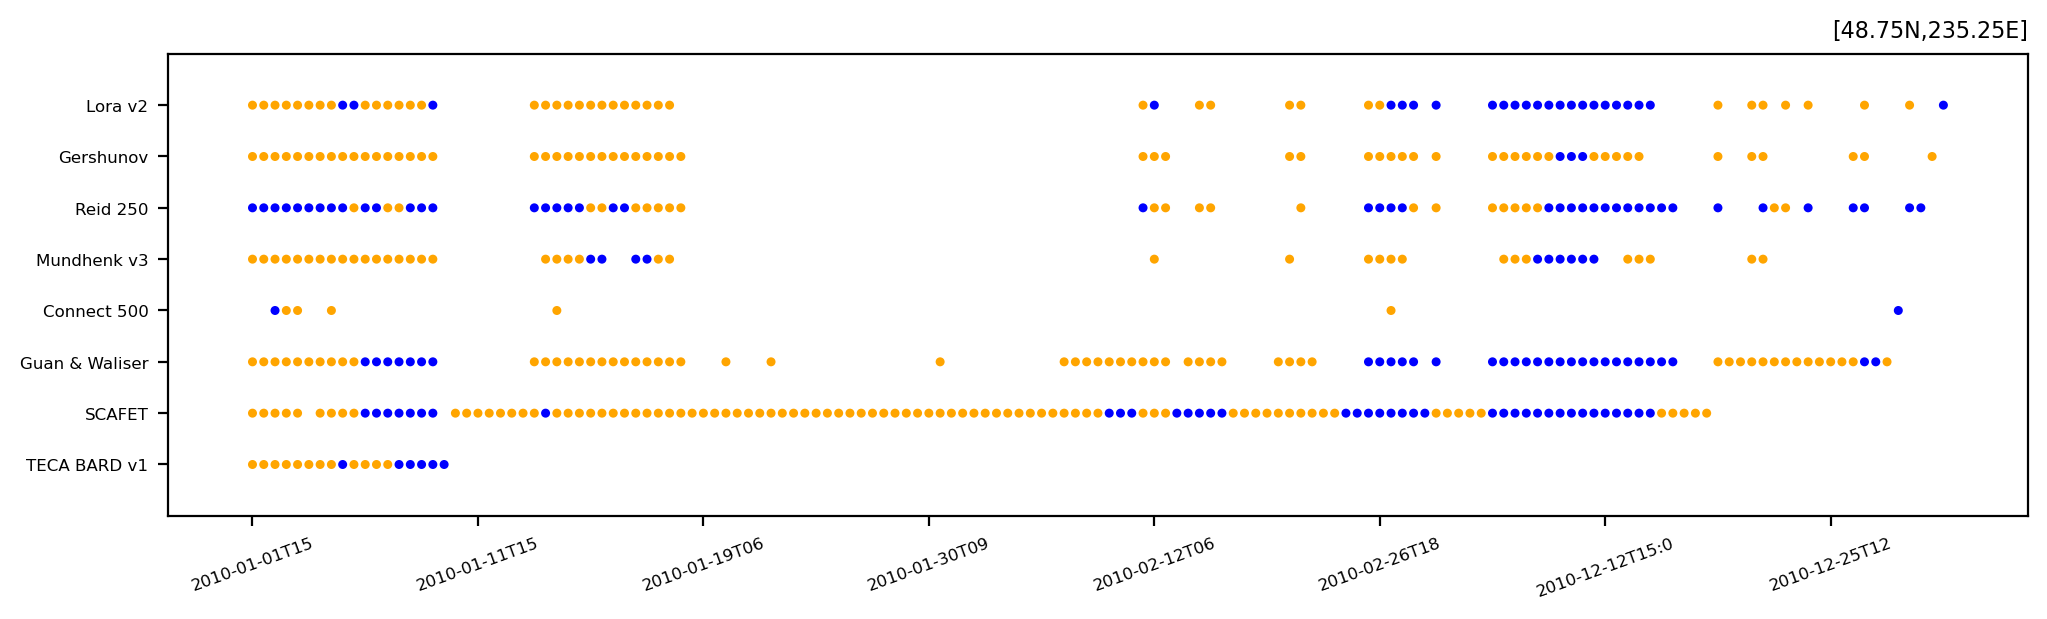

In [217]:
ardt_names = ['cascade_bard_v1','SCAFET','guan_waliser','connect500','mundhenk_v3','reid250','gershunov','lora_v2']
title_names  = ['TECA BARD v1','SCAFET','Guan & Waliser','Connect 500', 'Mundhenk v3', 'Reid 250',  'Gershunov','Lora v2']


main_xticks=[]
#fig,axes = plt.subplots(ncols = 1, nrows=11, figsize=(12,8))
fig,ax = plt.subplots(ncols = 1 ,figsize=(12,3))

#for (lty,lnx),(ix,ax) in zip(random_locs,enumerate(axes.flat)):
for lty,lnx in random_locs[:1]:

    xticks=[]
    
    for arx,ardt in enumerate(ardt_names):
    
        check = f'{lty}{lnx}_2010-'
        cluster = [int(eval(f'{ardt}_tagged')[a]) for a in eval(f'{ardt}_tagged').keys() if check in a]
        xdata=[a.split('_')[1][:-12] for a in eval(f'{ardt}_tagged').keys() if check in a]
        ydata = [arx+1]*len(xdata)
        colors = [eval(f'{ardt}_colors')[a] for a in eval(f'{ardt}_colors').keys() if check in a]
        
        xticks.append(xdata)
        ax.scatter(xdata,ydata,c=colors,s=5)#(np.array(cluster)+1)*10)#,c='black')
        
        ax.set_ylim(0,9)
    xticks=sum(xticks,[])
    xticks = np.unique(xticks)
    ax.set_xticks('')
    main_xticks.append(xticks)
    
    if ix %1 == 0 :#or ix == 5:
        ax.set_yticks(ticks = np.arange(1,9), labels=title_names,rotation='horizontal',fontsize=6)
    else:
        ax.set_yticks(ticks = np.arange(1,9), labels=['','','','','','','',''],rotation='horizontal')
        
    ax.set_title(f'[{lty}N,{lnx}E]', loc='right', fontsize=8)
    #ax.set_xlim()
main_xticks_lists = [list(x) if isinstance(x, (np.ndarray, np.str_)) else x for x in main_xticks]
main_xticks=sum(main_xticks_lists,[])
main_xticks = np.unique(main_xticks)
main_xticks_positions = np.arange(0, len(main_xticks), 20)
main_xticks_labels = [main_xticks[i] for i in main_xticks_positions]
plt.xticks(main_xticks_positions,main_xticks_labels,rotation=20,fontsize=6)

    #ax.legend(handles=xdata)
    # Create legend
#plt.savefig(f'Images/{lty}{lnx}Descrep.png',dpi=300)

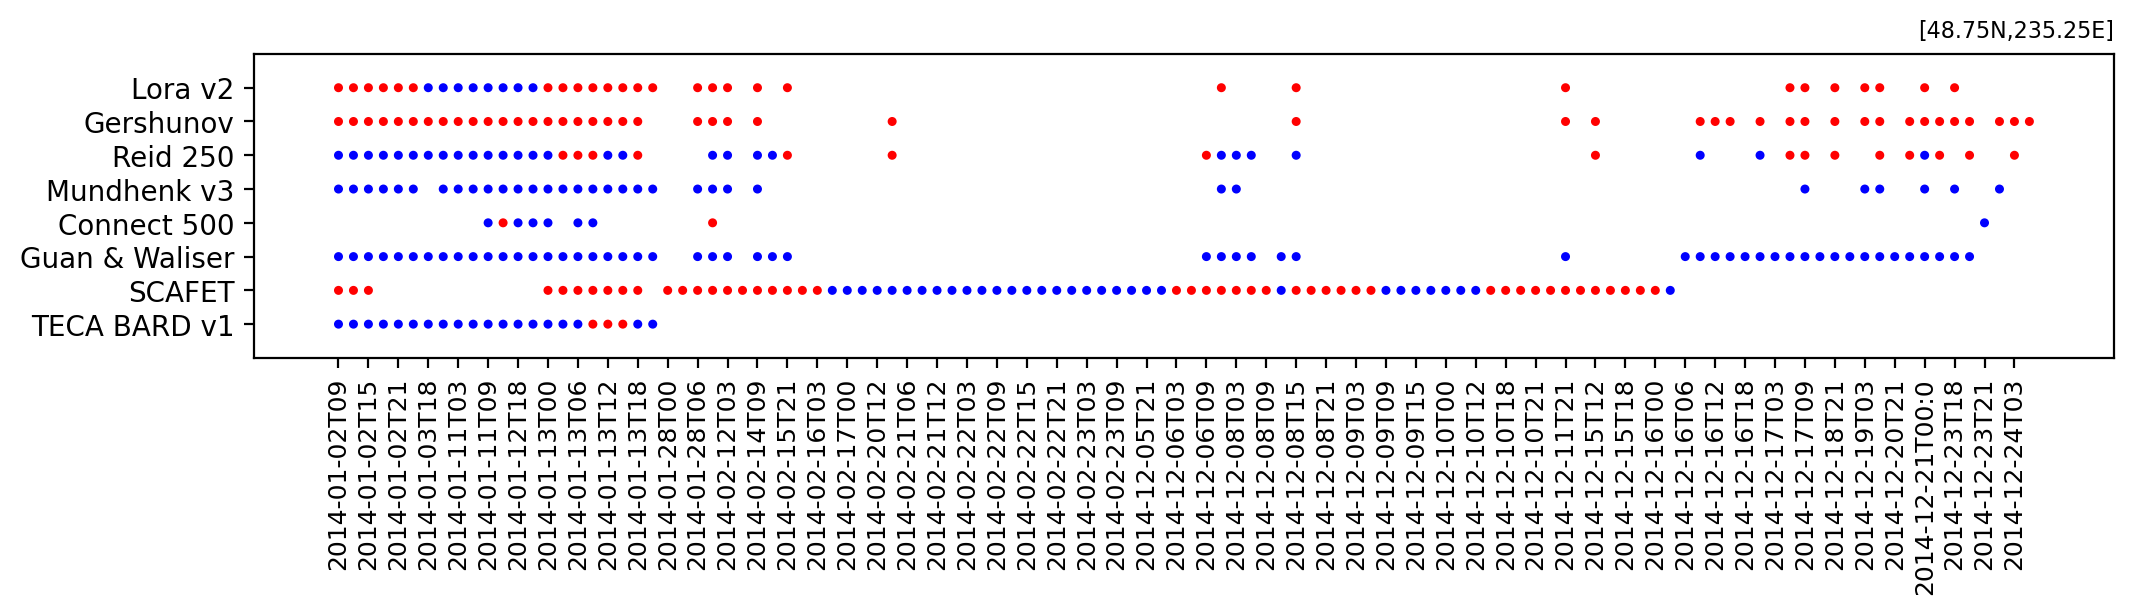

In [35]:
ardt_names = ['cascade_bard_v1','SCAFET','guan_waliser','connect500','mundhenk_v3','reid250','gershunov','lora_v2']
title_names  = ['TECA BARD v1','SCAFET','Guan & Waliser','Connect 500', 'Mundhenk v3', 'Reid 250',  'Gershunov','Lora v2']


main_xticks=[]
#fig,axes = plt.subplots(ncols = 1, nrows=11, figsize=(12,8))


#for (lty,lnx),(ix,ax) in zip(random_locs,enumerate(axes.flat)):
ix=0
for lty,lnx in random_locs[:1]:
    fig,ax = plt.subplots(ncols = 1 ,figsize=(12,4))
    fig.subplots_adjust(bottom=0.5)
    xticks=[]
    
    for arx,ardt in enumerate(ardt_names):
    
        yr = '2014'
        check = f'{lty}{lnx}_{yr}-'
        cluster = [int(eval(f'{ardt}_tagged')[a]) for a in eval(f'{ardt}_tagged').keys() if check in a]
        xdata=[a.split('_')[1][:-12] for a in eval(f'{ardt}_tagged').keys() if check in a]
        ydata = [arx+1]*len(xdata)
        colors = [eval(f'{ardt}_colors')[a] for a in eval(f'{ardt}_colors').keys() if check in a]
        
        xticks.append(xdata)
        ax.scatter(xdata,ydata,c=colors,s=5)#(np.array(cluster)+1)*10)#,c='black')
        
        ax.set_ylim(0,9)
    xticks=sum(xticks,[])
    xticks = np.unique(xticks)
    xticks_positions = np.arange(0, len(xticks),2)
    xticks_labels = [xticks[i] for i in xticks_positions]
    ax.set_xticks(xticks_positions,xticks_labels,rotation=90,fontsize=9)
    main_xticks.append(xticks)
    
    if ix %1 == 0 :#or ix == 5:
        ax.set_yticks(ticks = np.arange(1,9), labels=title_names,rotation='horizontal',fontsize=10)
    else:
        ax.set_yticks(ticks = np.arange(1,9), labels=['','','','','','','',''],rotation='horizontal')
        
    ax.set_title(f'[{lty}N,{lnx}E]', loc='right', fontsize=8)
    #date_range = pd.date_range(f'{yr}-12',f'{yr}-02',freq='6H')
    #plt.xticks(range(len(date_range)),labels=date_range)
    #ax.set_xlim()
    #main_xticks_lists = [list(x) if isinstance(x, (np.ndarray, np.str_)) else x for x in main_xticks]
    #main_xticks=sum(main_xticks_lists,[])
    #main_xticks = np.unique(main_xticks)
    #main_xticks_positions = np.arange(0, len(main_xticks))
    #main_xticks_labels = [main_xticks[i] for i in main_xticks_positions]
    #plt.xticks(main_xticks_positions,main_xticks_labels,rotation=90,fontsize=6)
    #plt.show()
        #ax.legend(handles=xdata)
        # Create legend
    #plt.savefig(f'Images/{lty}{lnx}Descrep{yr}.png',dpi=300)

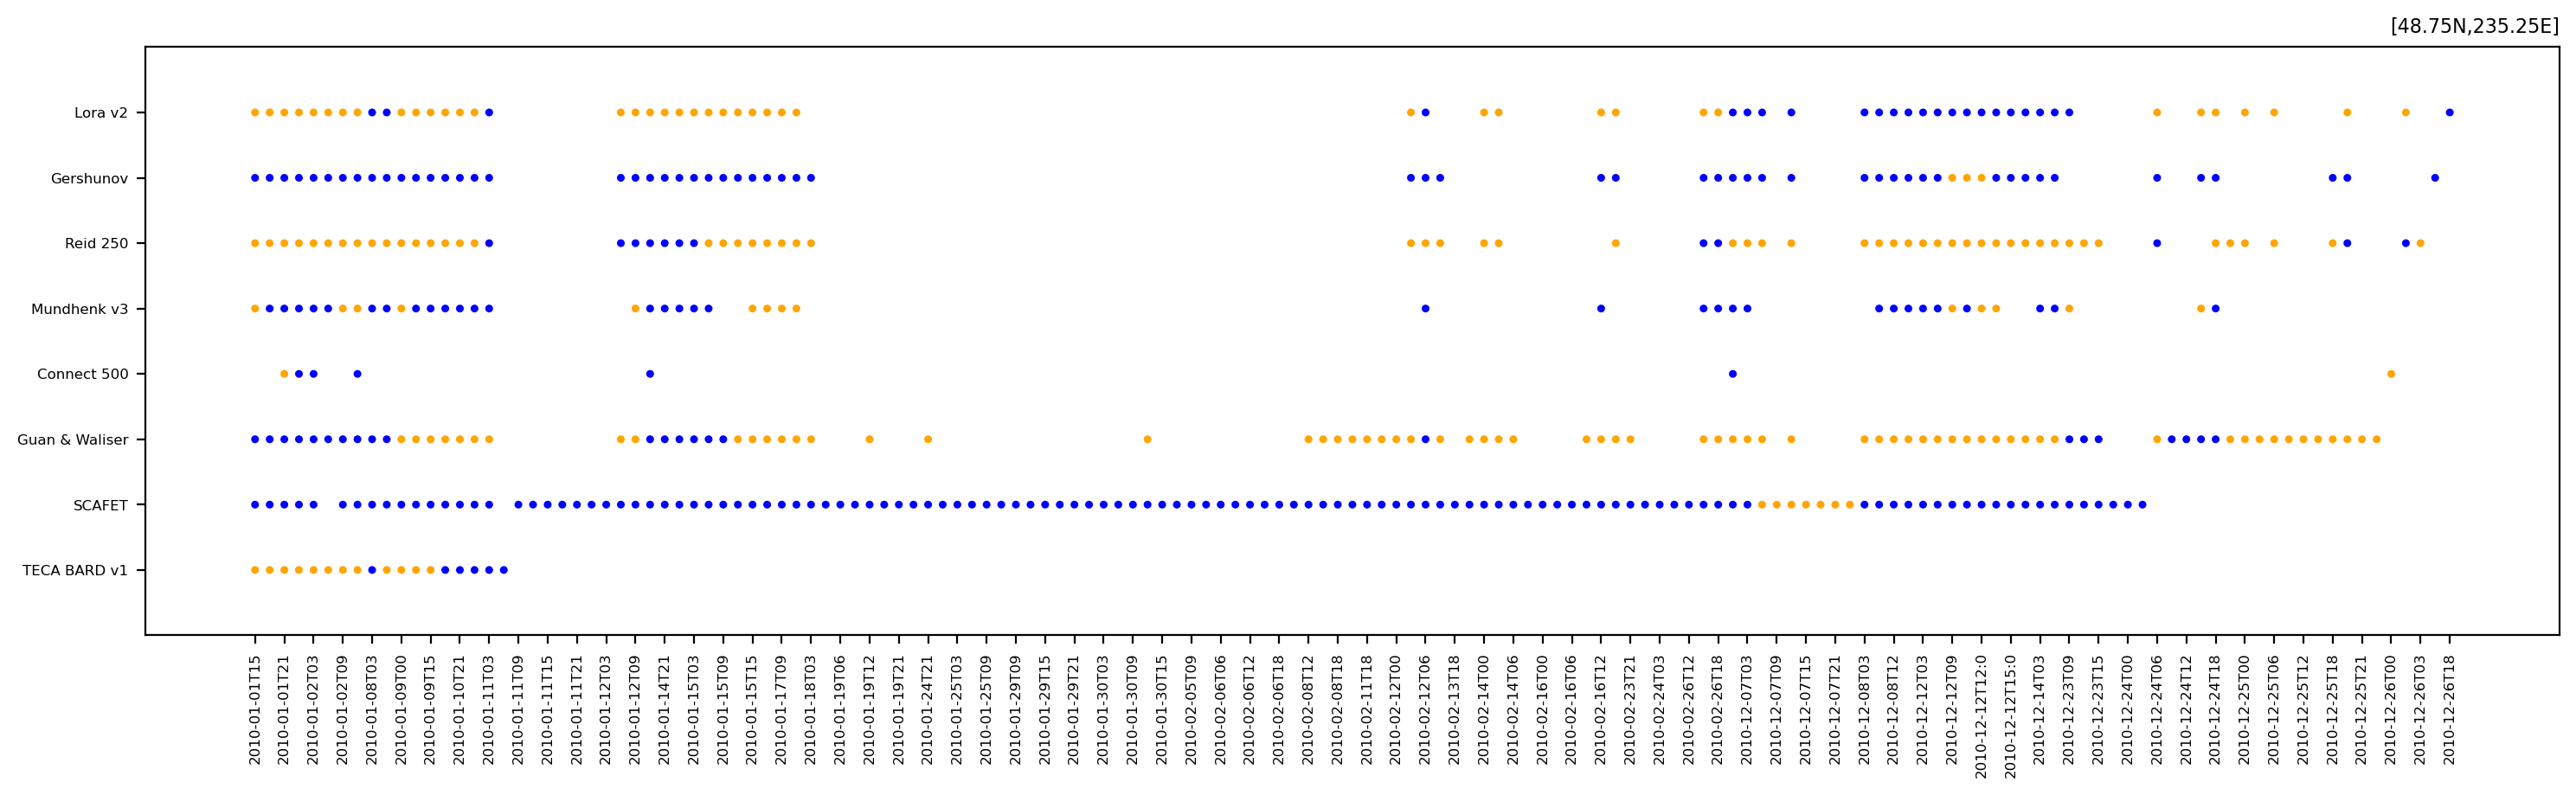

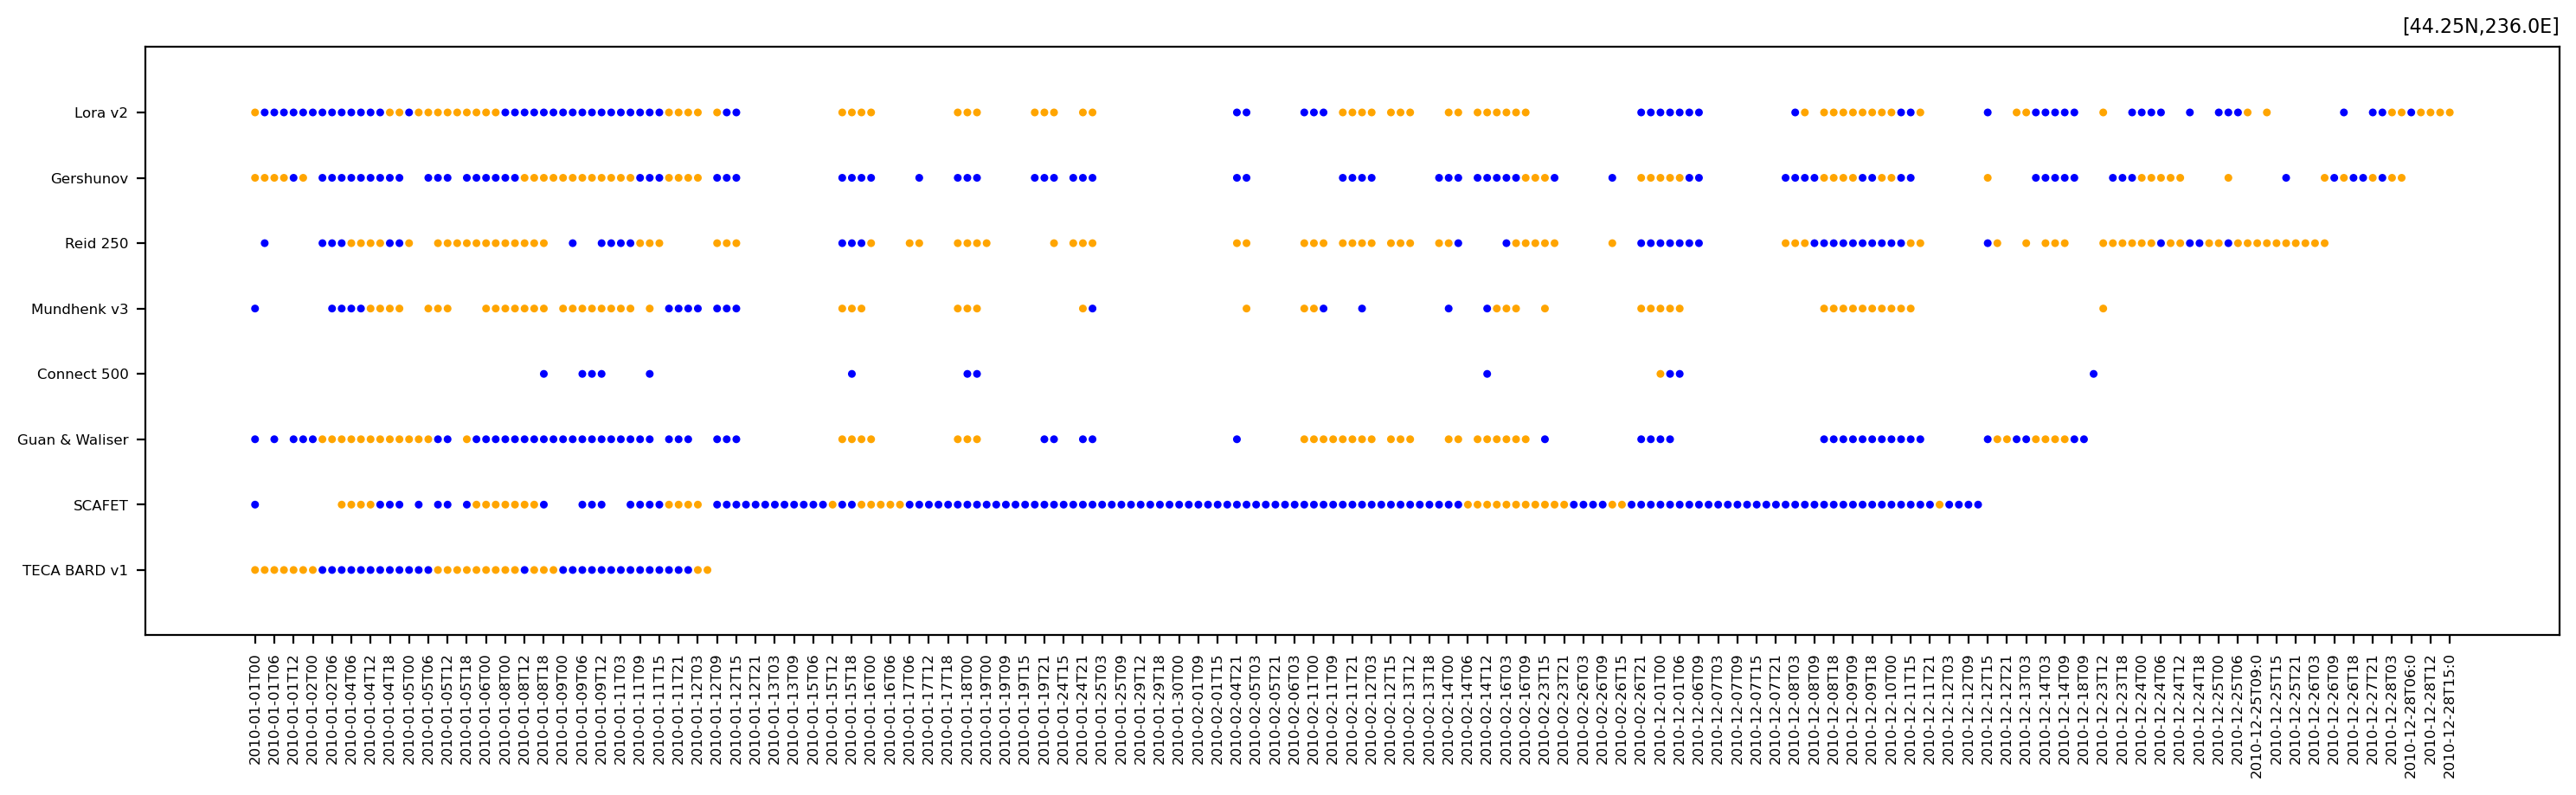

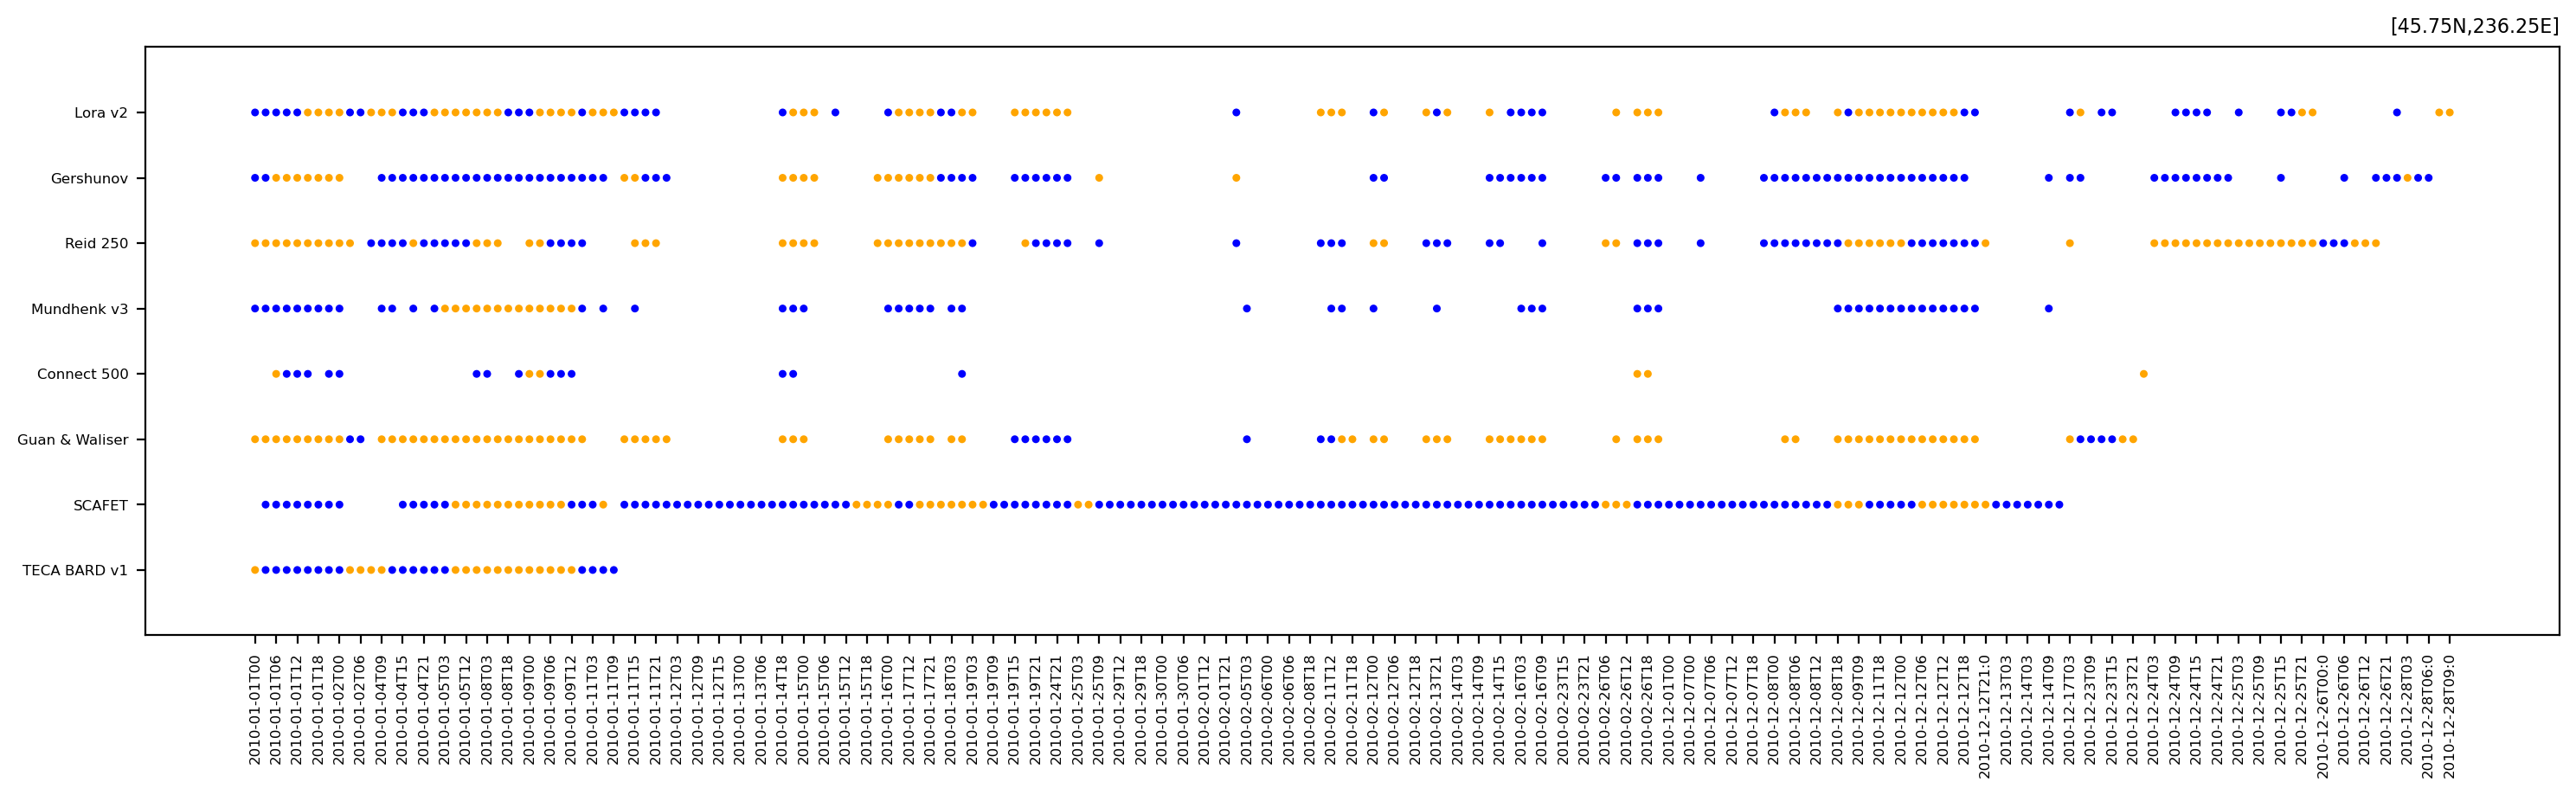

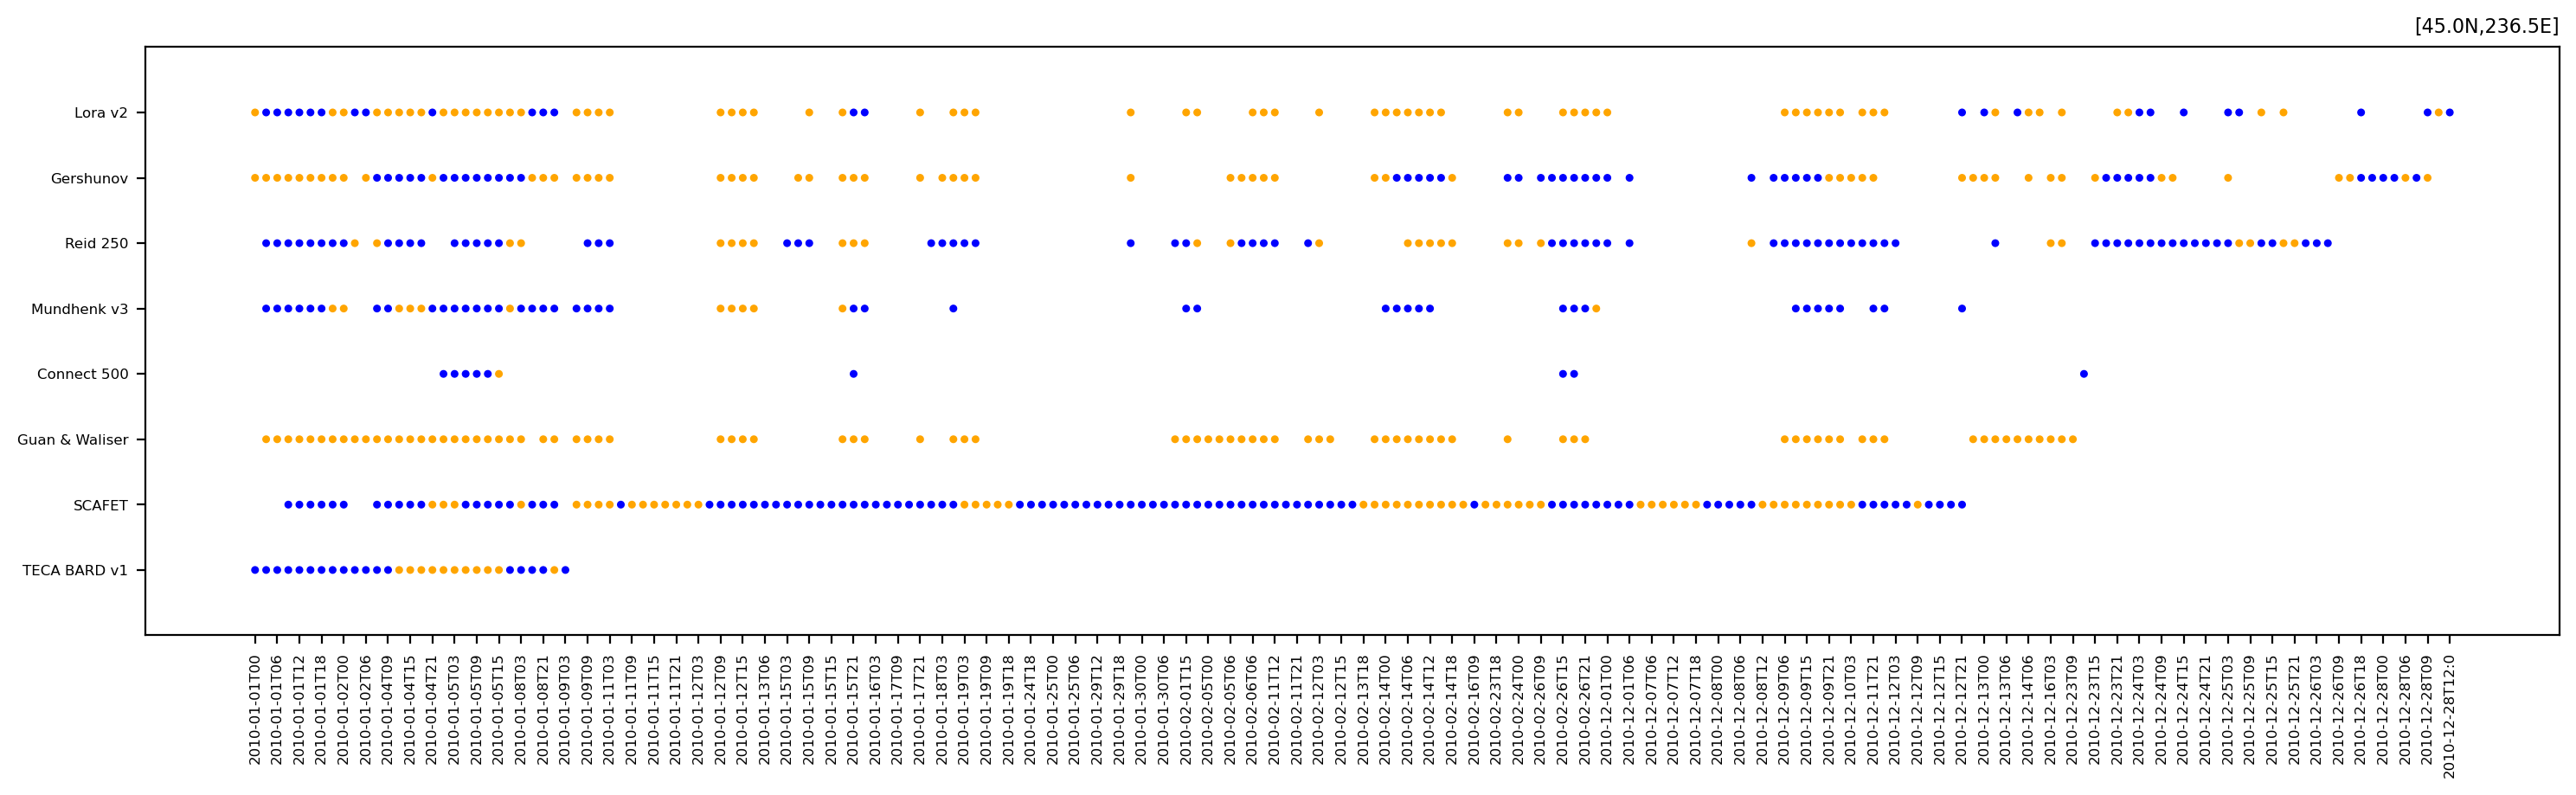

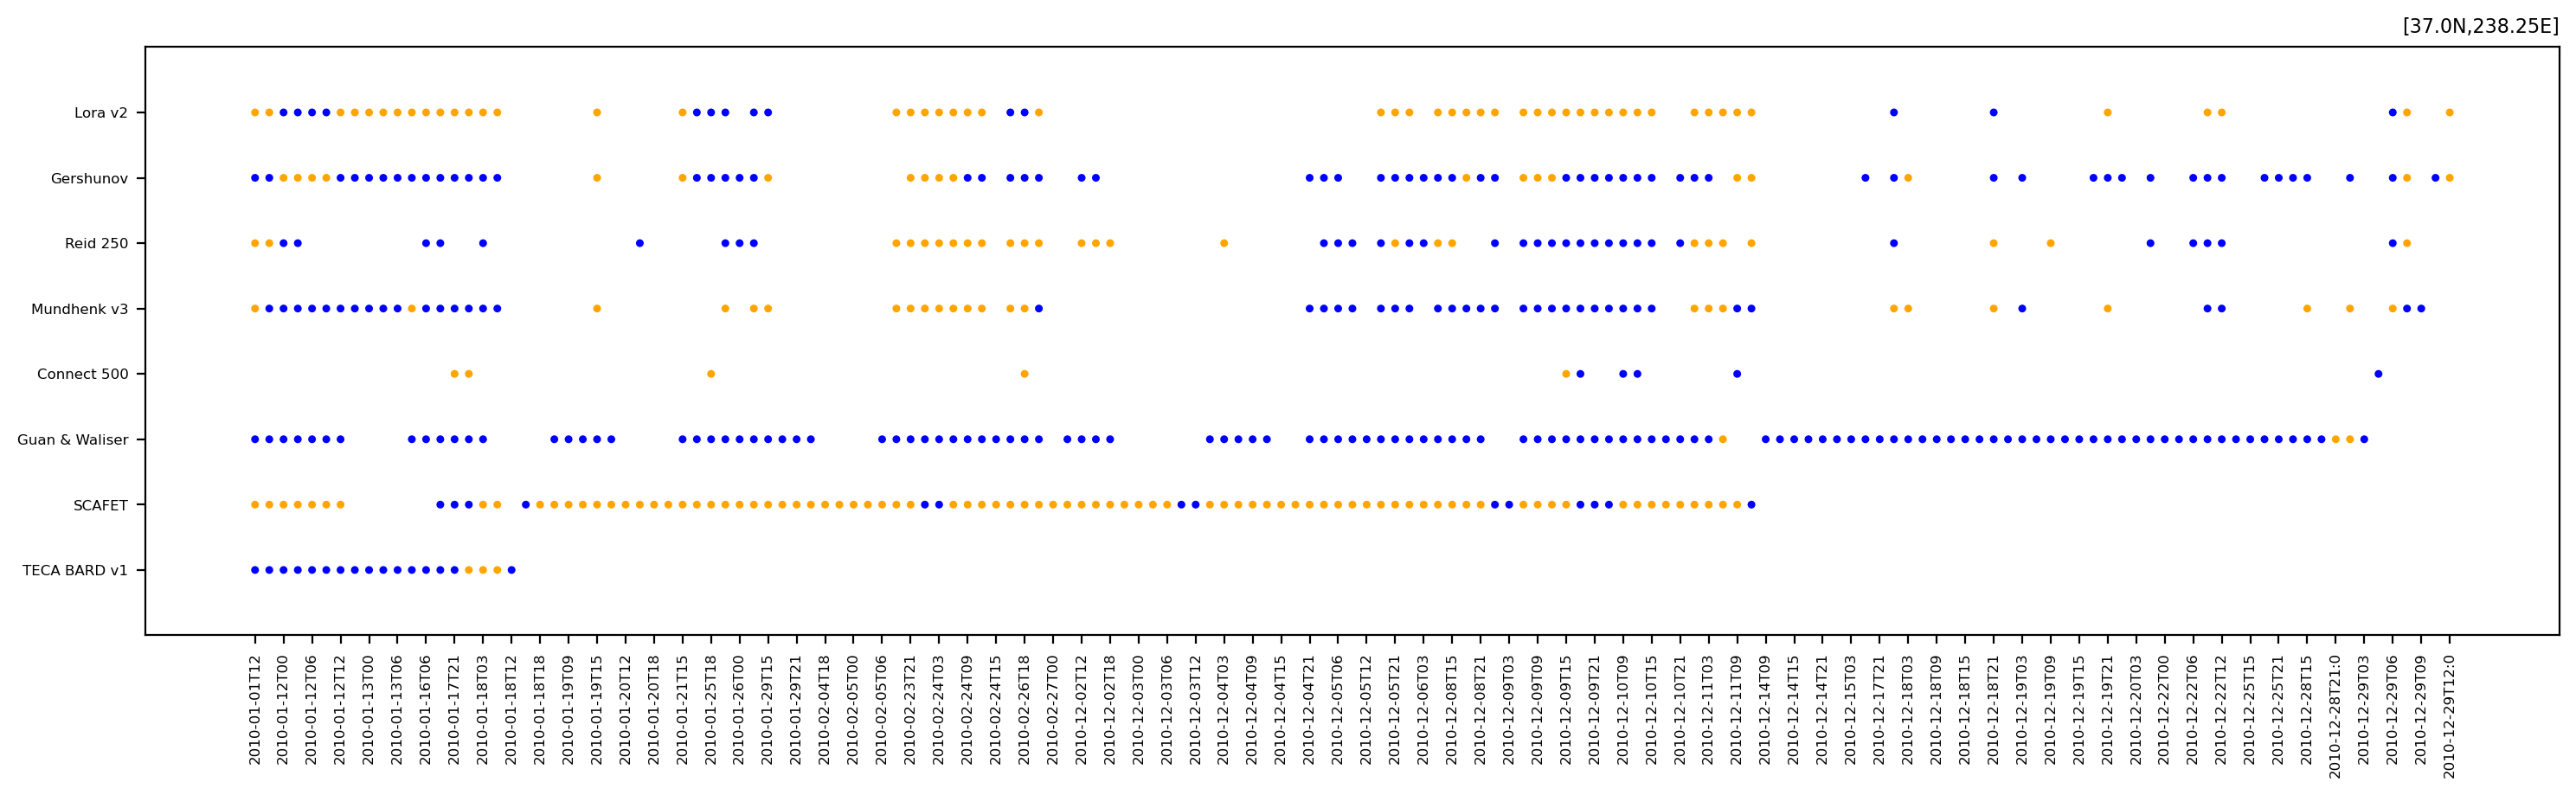

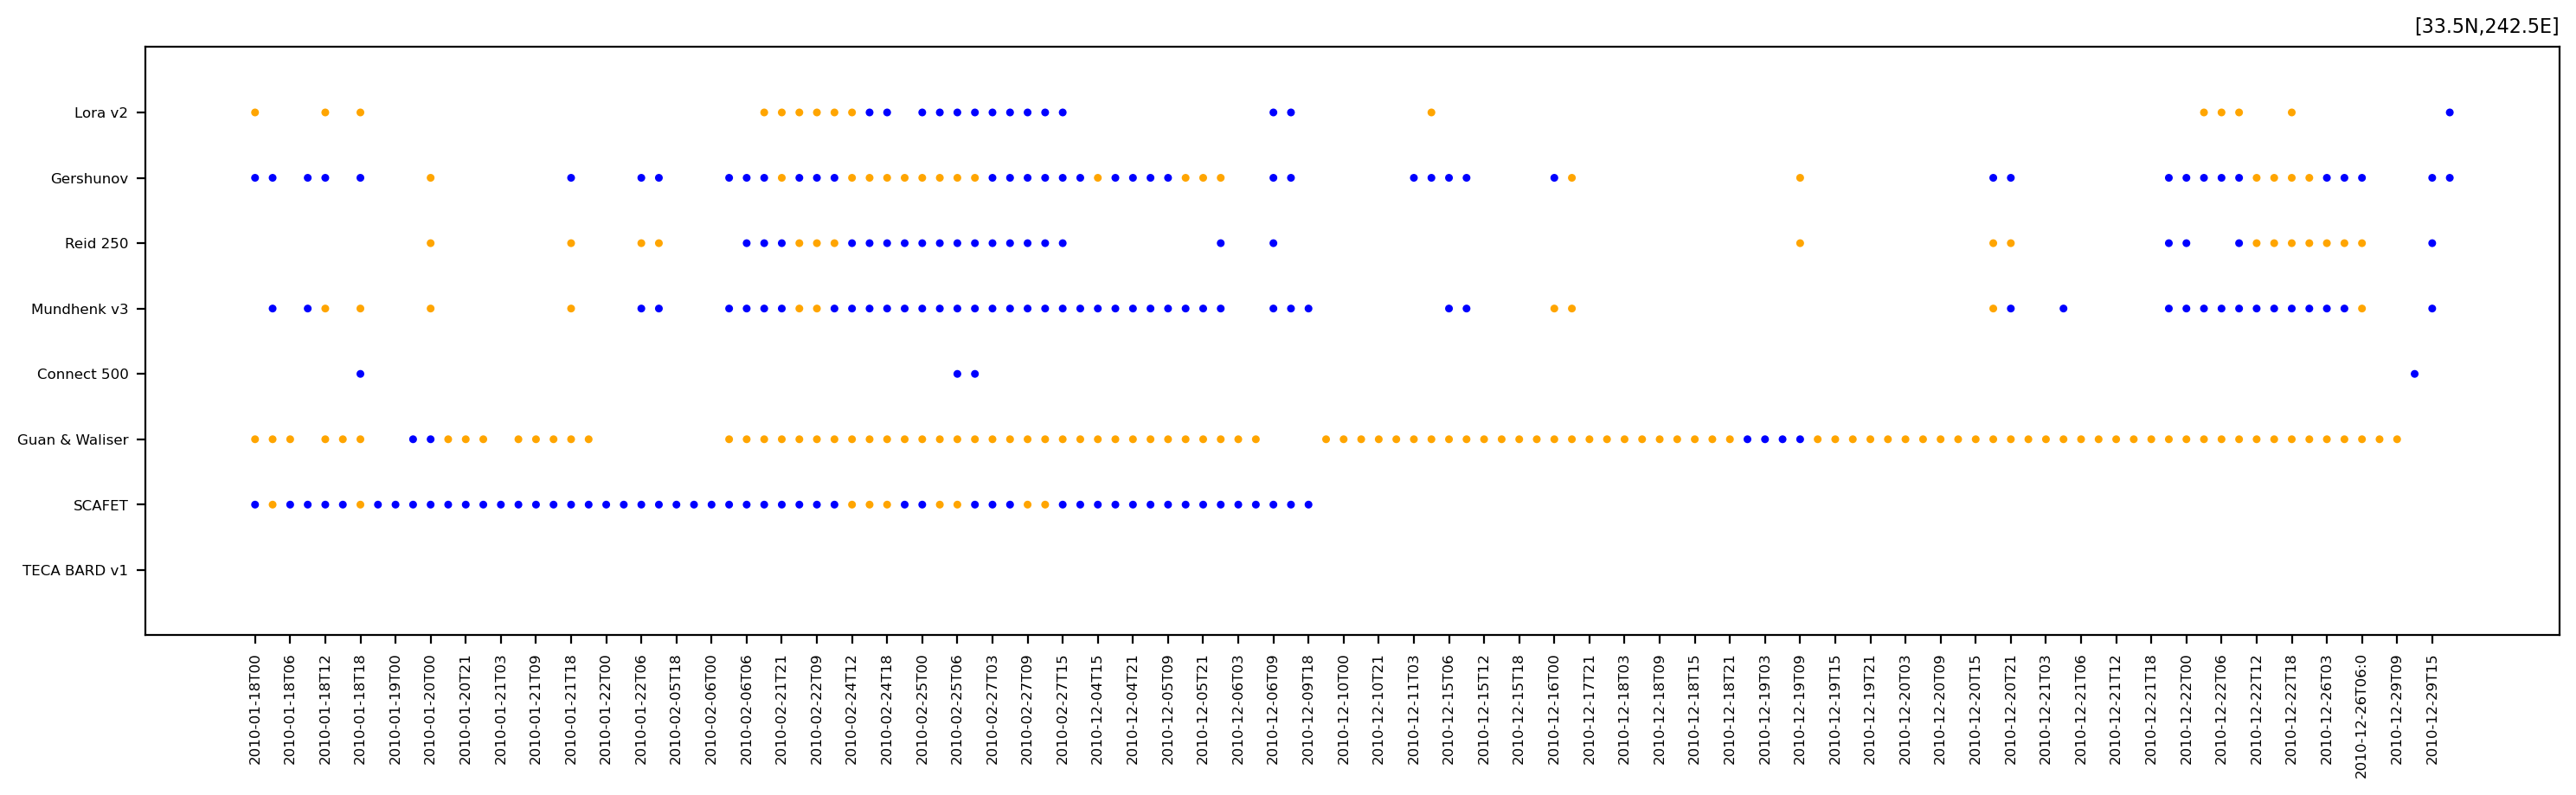

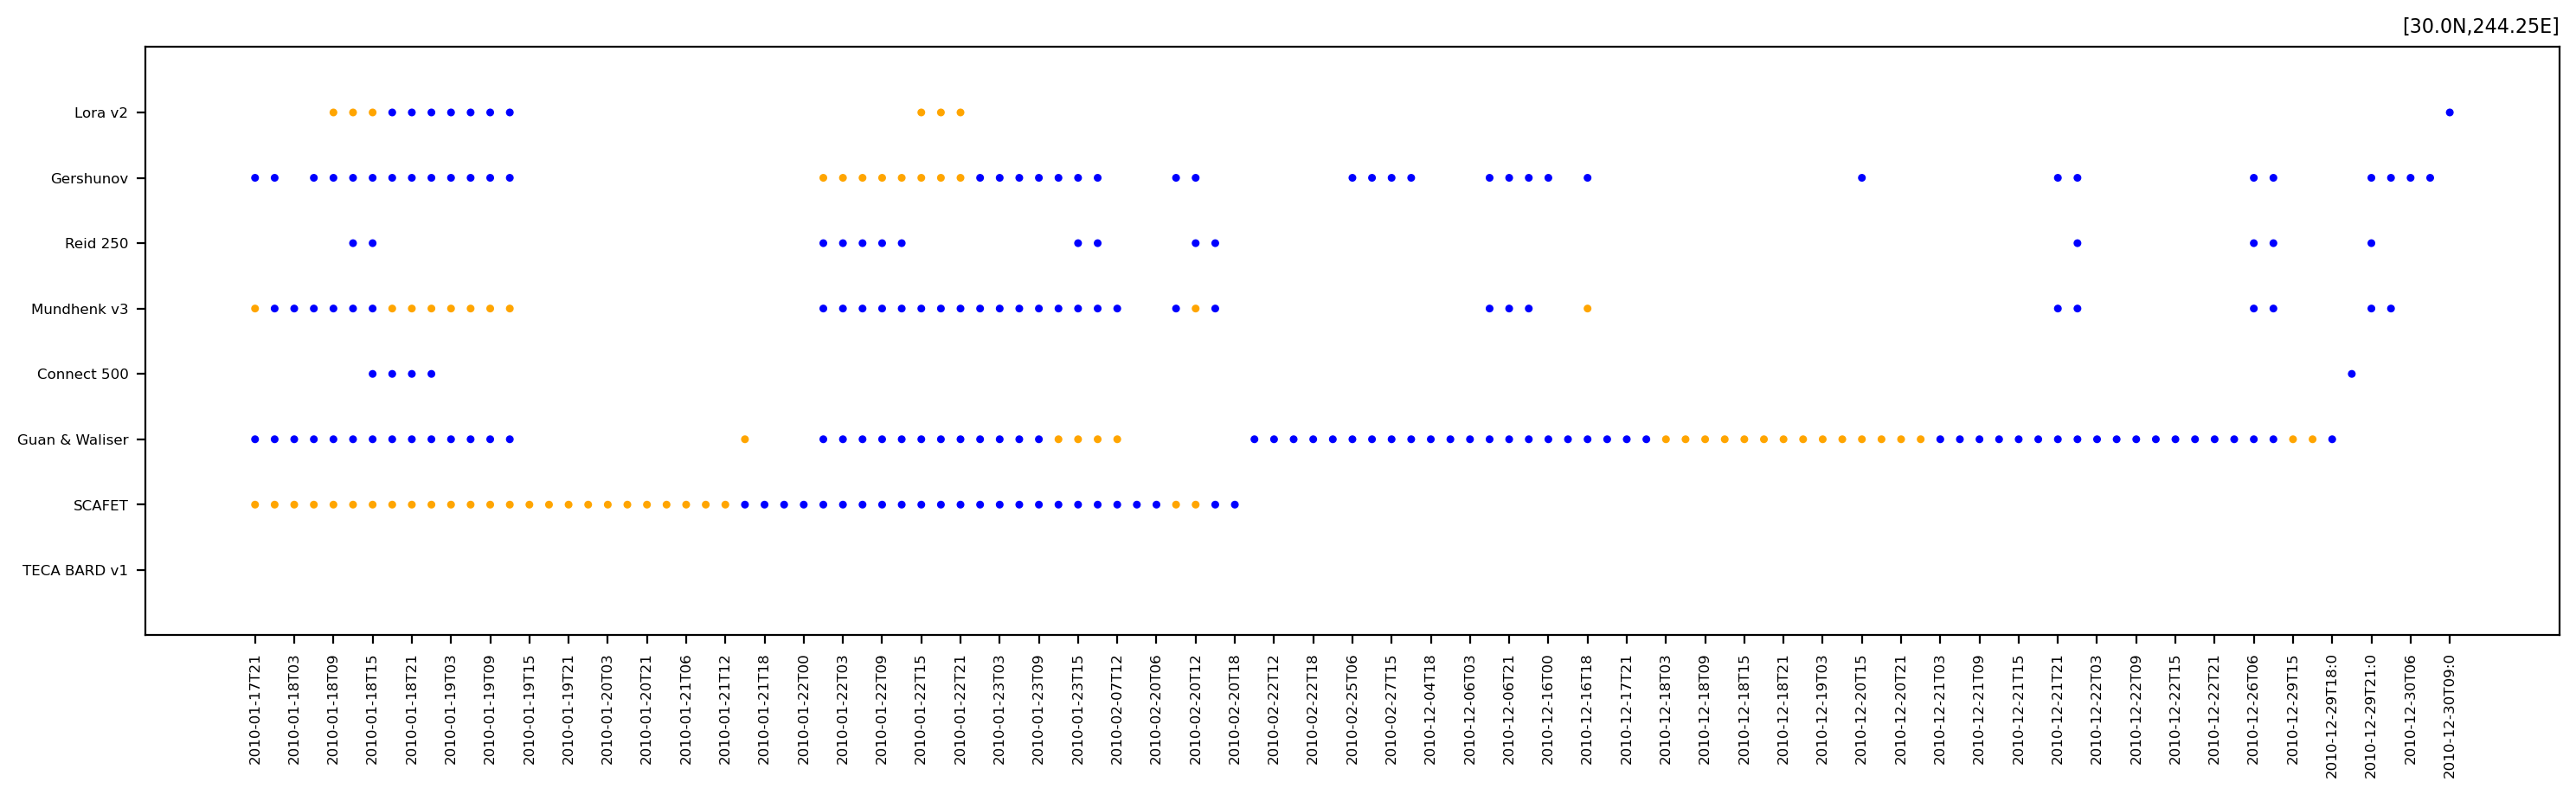

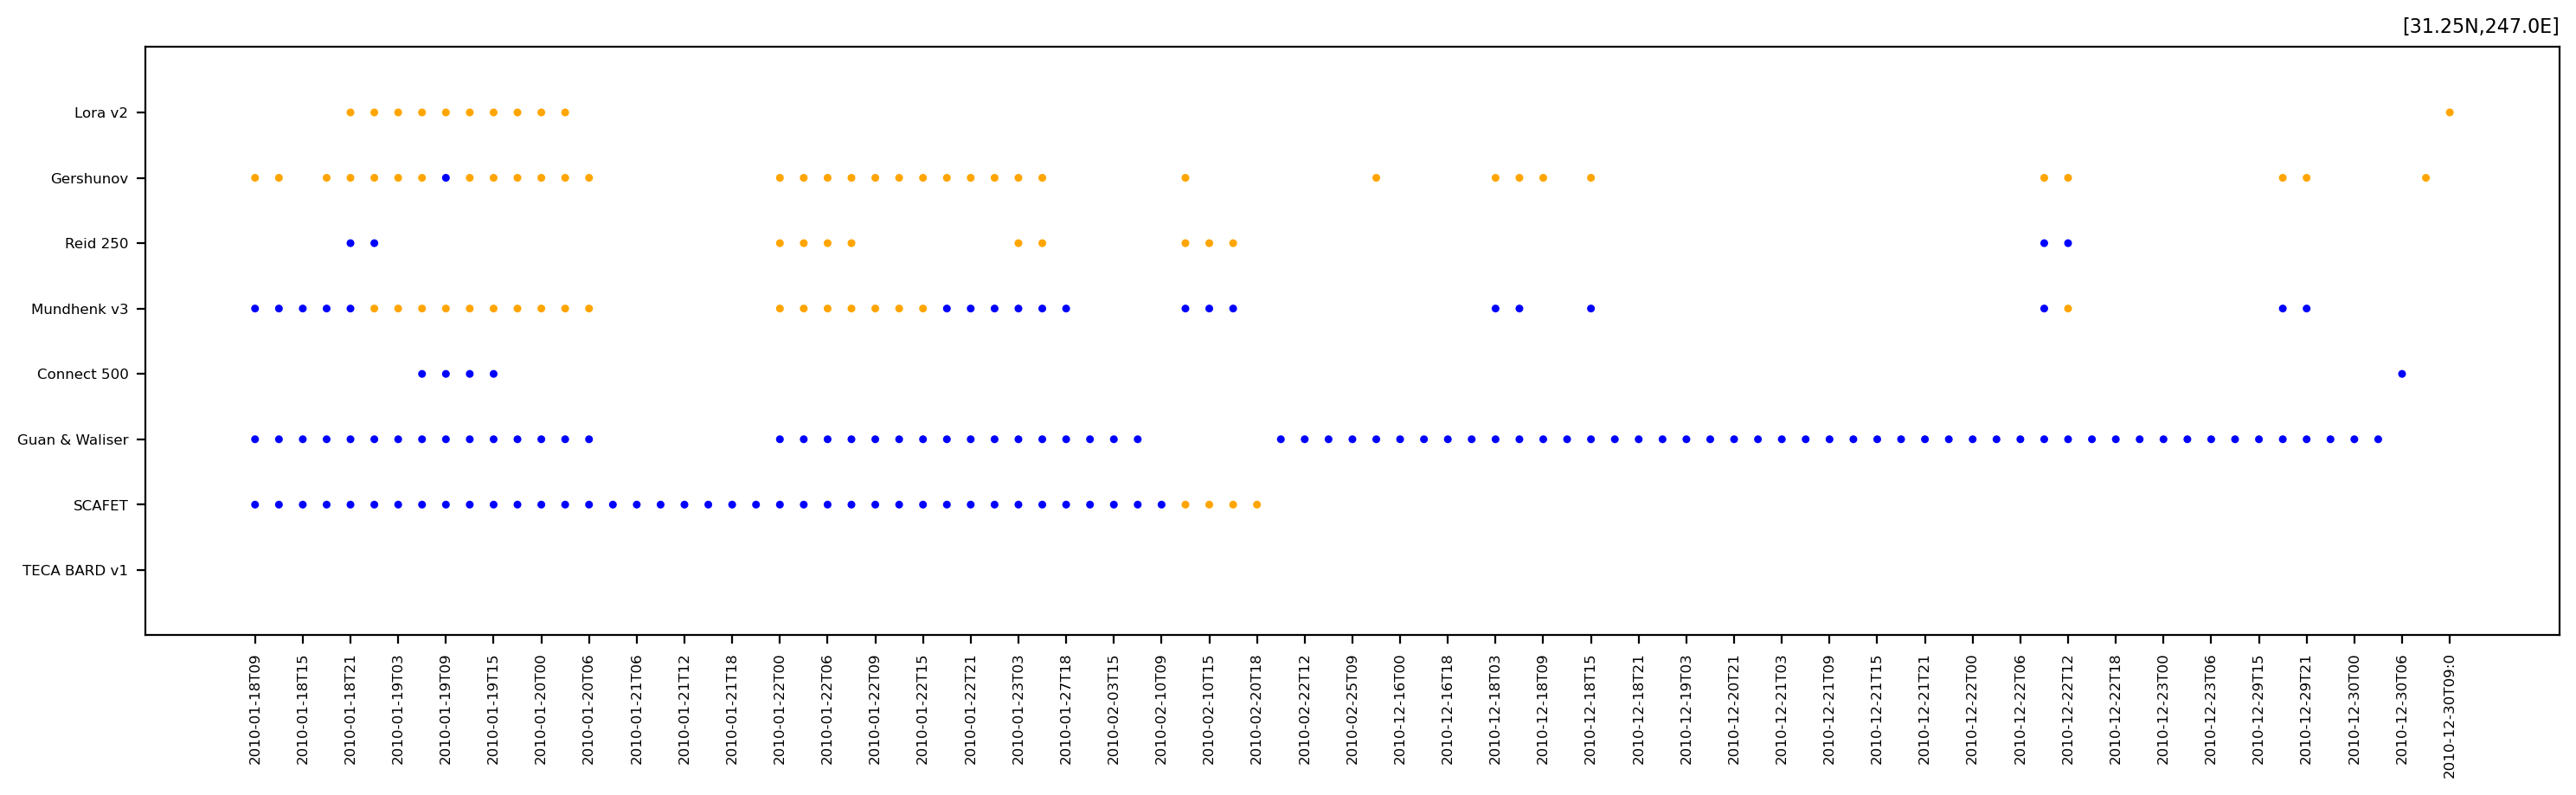

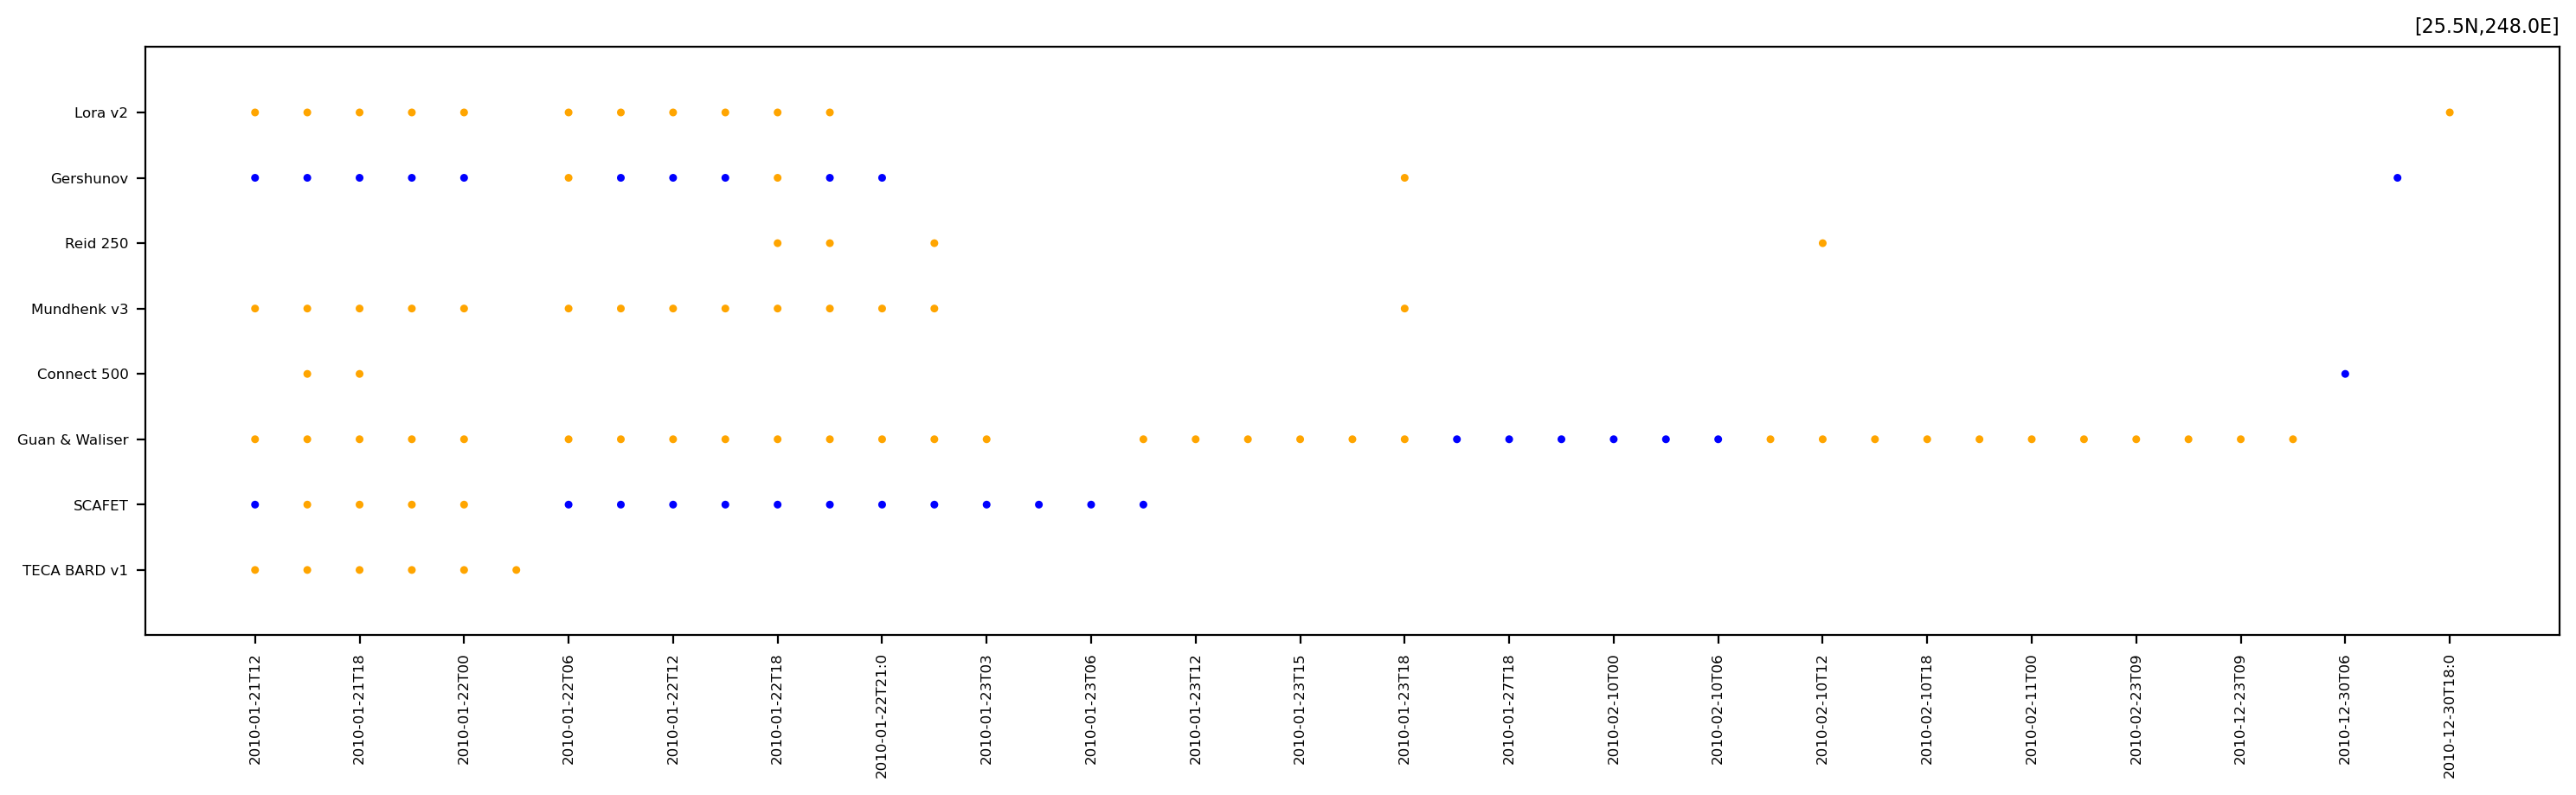

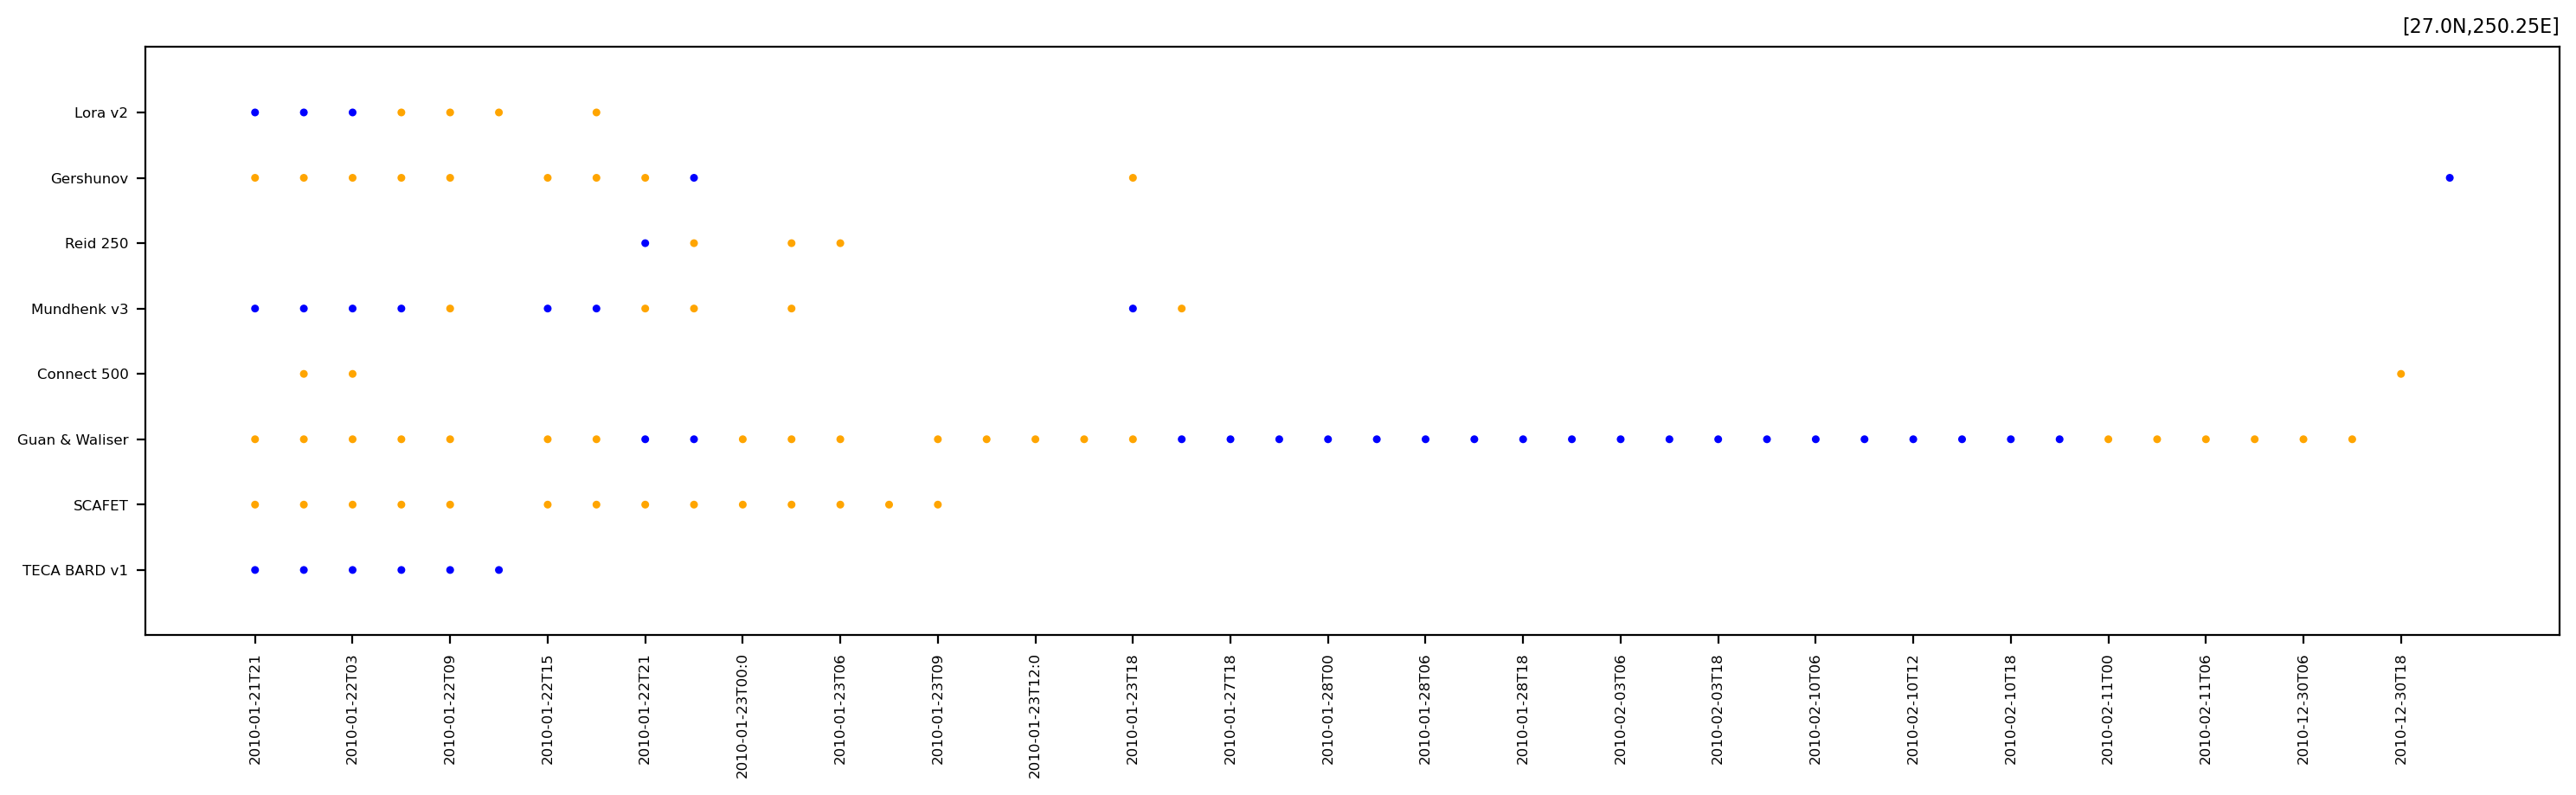

In [8]:
ardt_names = ['cascade_bard_v1','SCAFET','guan_waliser','connect500','mundhenk_v3','reid250','gershunov','lora_v2']
title_names  = ['TECA BARD v1','SCAFET','Guan & Waliser','Connect 500', 'Mundhenk v3', 'Reid 250',  'Gershunov','Lora v2']


main_xticks=[]
#fig,axes = plt.subplots(ncols = 1, nrows=11, figsize=(12,8))


#for (lty,lnx),(ix,ax) in zip(random_locs,enumerate(axes.flat)):
ix=0
for lty,lnx in random_locs:
    fig,ax = plt.subplots(ncols = 1 ,figsize=(18,5))
    fig.subplots_adjust(bottom=0.2)
    xticks=[]
    
    for arx,ardt in enumerate(ardt_names):
    
        yr = '2010'
        check = f'{lty}{lnx}_{yr}-'
        cluster = [int(eval(f'{ardt}_tagged')[a]) for a in eval(f'{ardt}_tagged').keys() if check in a]
        xdata=[a.split('_')[1][:-12] for a in eval(f'{ardt}_tagged').keys() if check in a]
        ydata = [arx+1]*len(xdata)
        colors = [eval(f'{ardt}_colors')[a] for a in eval(f'{ardt}_colors').keys() if check in a]
        
        xticks.append(xdata)
        ax.scatter(xdata,ydata,c=colors,s=5)#(np.array(cluster)+1)*10)#,c='black')
        
        ax.set_ylim(0,9)
    xticks=sum(xticks,[])
    xticks = np.unique(xticks)
    xticks_positions = np.arange(0, len(xticks),2)
    xticks_labels = [xticks[i] for i in xticks_positions]
    ax.set_xticks(xticks_positions,xticks_labels,rotation=90,fontsize=6)
    main_xticks.append(xticks)
    
    if ix %1 == 0 :#or ix == 5:
        ax.set_yticks(ticks = np.arange(1,9), labels=title_names,rotation='horizontal',fontsize=6)
    else:
        ax.set_yticks(ticks = np.arange(1,9), labels=['','','','','','','',''],rotation='horizontal')
        
    ax.set_title(f'[{lty}N,{lnx}E]', loc='right', fontsize=8)
    #date_range = pd.date_range(f'{yr}-12',f'{yr}-02',freq='6H')
    #plt.xticks(range(len(date_range)),labels=date_range)
    #ax.set_xlim()
    #main_xticks_lists = [list(x) if isinstance(x, (np.ndarray, np.str_)) else x for x in main_xticks]
    #main_xticks=sum(main_xticks_lists,[])
    #main_xticks = np.unique(main_xticks)
    #main_xticks_positions = np.arange(0, len(main_xticks))
    #main_xticks_labels = [main_xticks[i] for i in main_xticks_positions]
    #plt.xticks(main_xticks_positions,main_xticks_labels,rotation=90,fontsize=6)
    #plt.show()
        #ax.legend(handles=xdata)
        # Create legend
    plt.savefig(f'Images/{lty}{lnx}Descrep{yr}.png',dpi=300)

In [213]:

for ardt in ardt_names:
    
    dates = eval(f'{ardt}')
    clusters = eval(f'{ardt}_clusters')
    locals()[f'{ardt}_tagged'] = {f'{date}':cl_tag for date,cl_tag in zip(dates,clusters)}
    
    tag1 = [tag for tag in eval(f'{ardt}_tagged').keys() if eval(f'{ardt}_tagged')[tag] == 1]
    tag2 = [tag for tag in eval(f'{ardt}_tagged').keys() if eval(f'{ardt}_tagged')[tag] == 0]

    if len(tag1)>len(tag2):
        for tag in tag1:
            eval(f'{ardt}_tagged')[tag] = 10
        for tag in tag2:
            eval(f'{ardt}_tagged')[tag] = 20
    elif len(tag2)>len(tag1):
        for tag in tag2:
            eval(f'{ardt}_tagged')[tag] = 10
        for tag in tag1:
            eval(f'{ardt}_tagged')[tag] = 20
            
    locals()[f'{ardt}_colors'] = {f'{date}':'blue' if eval(f'{ardt}_tagged')[cl_tag]==20 else 'orange' for date,cl_tag in zip(dates,eval(f'{ardt}_tagged').keys())}

In [195]:
tag1 = [tag for tag in cascade_bard_v1_tagged.keys() if cascade_bard_v1_tagged[tag] == 1]
tag2 = [tag for tag in cascade_bard_v1_tagged.keys() if cascade_bard_v1_tagged[tag] == 0]

if len(tag1)>len(tag2):
    for tag in tag1:
        cascade_bard_v1_tagged[tag] = 10
    for tag in tag2:
        cascade_bard_v1_tagged[tag] = 20
elif len(tag2)>len(tag1):
    for tag in tag2:
        cascade_bard_v1_tagged[tag] = 10
    for tag in tag1:
        cascade_bard_v1_tagged[tag] = 20

In [196]:
cascade_bard_v1_tagged

{'48.75235.25_1980-01-12T06:00:00.00000': 10,
 '48.75235.25_1980-01-12T09:00:00.00000': 10,
 '48.75235.25_1980-01-12T12:00:00.00000': 10,
 '48.75235.25_1980-01-12T15:00:00.00000': 10,
 '48.75235.25_1980-02-02T15:00:00.00000': 20,
 '48.75235.25_1980-02-26T06:00:00.00000': 10,
 '48.75235.25_1980-02-26T09:00:00.00000': 10,
 '48.75235.25_1980-02-26T12:00:00.00000': 10,
 '48.75235.25_1980-02-26T15:00:00.00000': 10,
 '48.75235.25_1980-02-26T18:00:00.00000': 10,
 '48.75235.25_1980-02-26T21:00:00.00000': 10,
 '48.75235.25_1980-12-10T00:00:00.00000': 10,
 '48.75235.25_1980-12-10T06:00:00.00000': 10,
 '48.75235.25_1980-12-10T09:00:00.00000': 10,
 '48.75235.25_1980-12-10T12:00:00.00000': 10,
 '48.75235.25_1980-12-10T15:00:00.00000': 10,
 '48.75235.25_1980-12-10T18:00:00.00000': 10,
 '48.75235.25_1980-12-10T21:00:00.00000': 10,
 '48.75235.25_1980-12-11T00:00:00.00000': 10,
 '48.75235.25_1980-12-11T03:00:00.00000': 10,
 '48.75235.25_1980-12-11T06:00:00.00000': 20,
 '48.75235.25_1980-12-11T09:00:00.

In [164]:
len(tag1)

3464

In [165]:
len(tag2)

3060

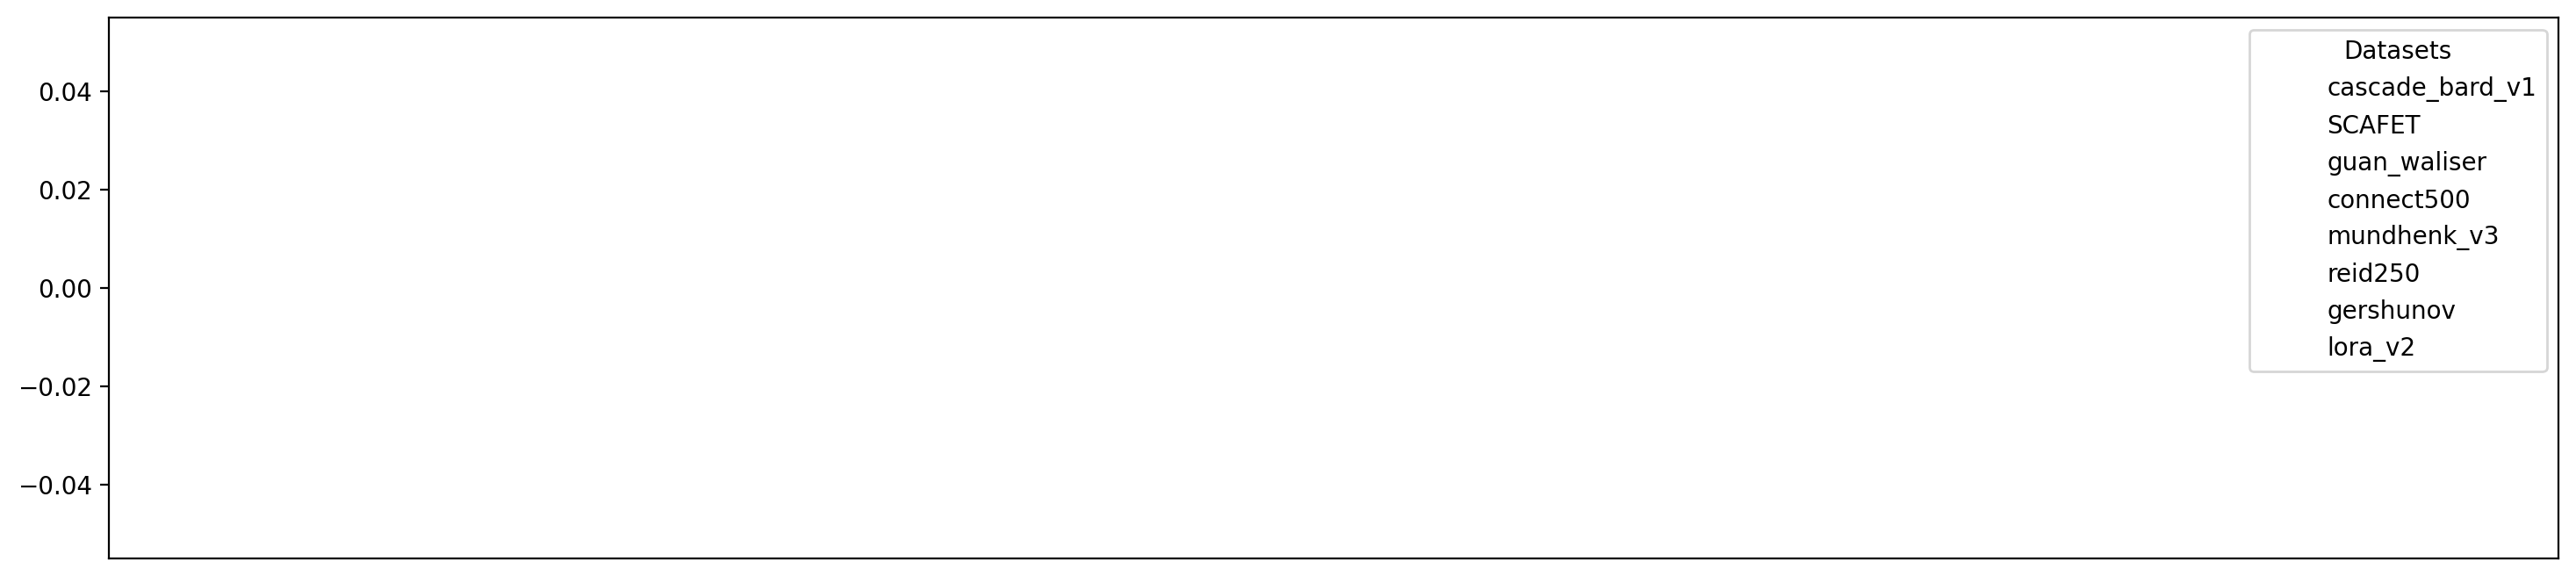

In [7]:
import matplotlib.pyplot as plt
import numpy as np

ardt_names = ['cascade_bard_v1', 'SCAFET', 'guan_waliser', 'connect500', 'mundhenk_v3', 'reid250', 'gershunov', 'lora_v2']

# Example random_locs and ardt_tagged data
random_locs = [(0, 0)]  # Replace with actual random_locs data
cascade_bard_v1_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}
SCAFET_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}
guan_waliser_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}
connect500_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}
mundhenk_v3_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}
reid250_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}
gershunov_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}
lora_v2_tagged = {'0_0_2006-01-01': '0', '0_0_2006-02-01': '1'}

for lty, lnx in random_locs[:1]:
    xticks = []
    fig, ax = plt.subplots(figsize=(18, 4))
    scatter_points = []
    for arx, ardt in enumerate(ardt_names):
        check = f'{lty}{lnx}_2006-'
        cluster = [int(eval(f'{ardt}_tagged')[a]) for a in eval(f'{ardt}_tagged').keys() if check in a]
        xdata = [a.split('_')[1][:-12] for a in eval(f'{ardt}_tagged').keys() if check in a]
        ydata = [arx + 1] * len(xdata)
        
        xticks.append(xdata)
        scatter = ax.scatter(xdata, ydata, c=(np.array(cluster) + 1) * 15, label=ardt)
        scatter_points.append(scatter)
        
    xticks = sum(xticks, [])
    xticks = np.unique(xticks)
    xticks_positions = np.arange(0, len(xticks), 5)
    xticks_labels = [xticks[i] for i in xticks_positions]
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(xticks_labels, rotation=90)
    
    # Add legend
    ax.legend(handles=scatter_points, loc='upper right', title='Datasets')
    
    plt.show()


In [261]:
dds = xr.open_mfdataset('/global/cfs/cdirs/m1517/cascade/external_datasets/ARTMIP_NCAR_mirror/catalogues/tier2/ERA5/idl/ERA5.ar_tag.*.nc4')

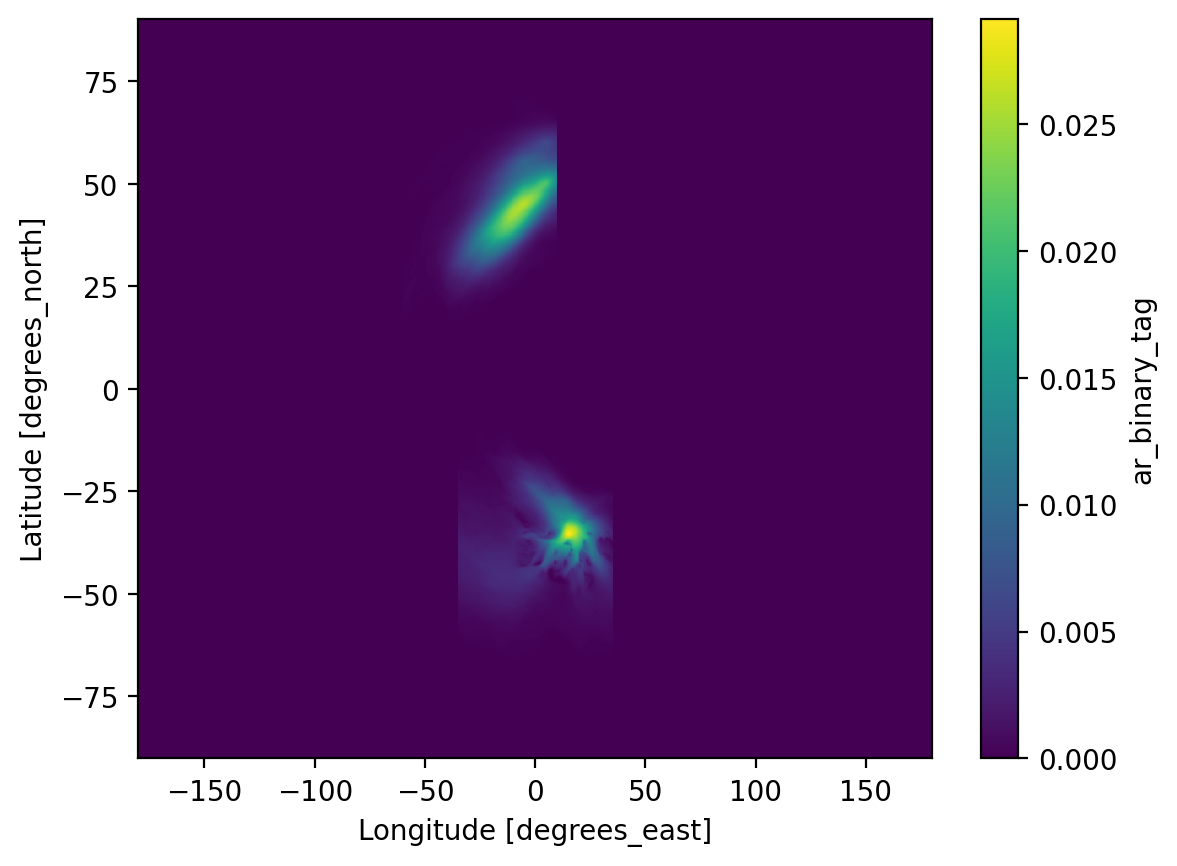

In [264]:
dds['ar_binary_tag'].mean('time').plot()

* ARs as a component of compound events 
* ARs in past, present, and future climates

# TEST FOR KMEANS TO SEE IF ITS WORKING AS IT SHOULD 

### CREATE DATA

In [1]:
exec(open('imports.py').read())

ERROR 1: PROJ: proj_create_from_database: Open of /global/homes/k/kquagra/miniconda3/envs/climate_py311.5/share/proj failed


In [2]:
pvds = xr.open_dataset('MERRA2/conus_ARS_DJF_comps_connect500_epv_raw/ARS_supperimposed_epv_2009_connect500.nc')
ivtds = xr.open_dataset('MERRA2/conus_ARS_DJF_comps_connect500_ivt_raw/ARS_supperimposed_ivt_2009_connect500.nc')

In [40]:
pv1 = pvds.sel(lev=500)['EPV'][0]/1e-7
noise = xr.DataArray(np.random.rand(*pv1.shape), dims=pv1.dims, coords=pv1.coords)

In [95]:
pvd = [pvds.sel(lev=500).isel(time=ix)/1e-7 for ix in np.arange(0,58,12)] *20
ivd = [ivtds.isel(time=ix) for ix in np.arange(0,58,12)] *20

In [96]:
pv_noise =  xr.DataArray(np.random.rand(*pv1.shape), dims=pv1.dims, coords=pv1.coords)
ivt_noise =  xr.DataArray(np.random.rand(*pv1.shape), dims=pv1.dims, coords=pv1.coords)

newpv = []
newivt = []
for ix in range(100):
    ivt_data = ivd[ix]+ivt_noise
    ivt_data.coords['time'] = ix
    
    pv_data = pvd[ix]+pv_noise
    pv_data.coords['time'] = ix
    
    newivt.append(ivt_data)
    newpv.append(pv_data)

In [97]:
testpv = xr.concat(newpv,dim='time')
testivt = xr.concat(newivt,dim='time')

In [98]:
testpv.to_netcdf('MERRA2/test_epv/test_epv.nc')

In [99]:
testivt.to_netcdf('MERRA2/test_ivt/test_ivt.nc')

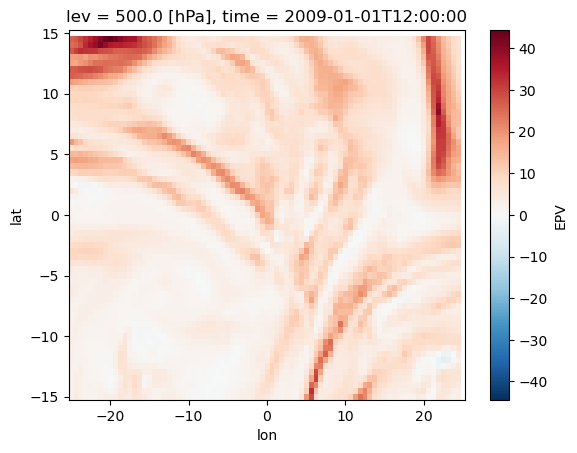

In [100]:
pvd[1]['EPV'].plot()

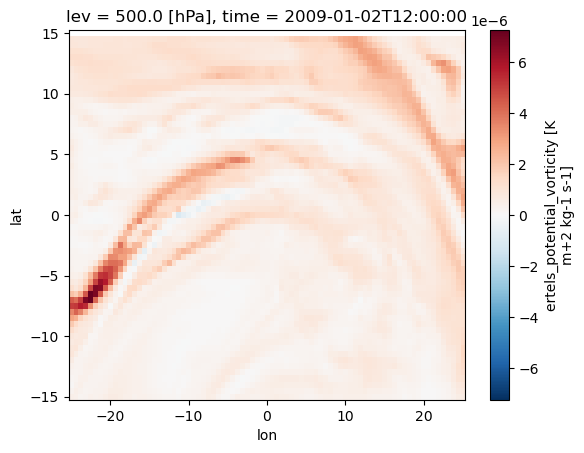

In [94]:
pvd[3]['EPV'].plot()